In [ ]:
#Importamos librerias requeridas para que el código funcione
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo .xlsx sin indice
from google.colab import files #orden que hace que el código busque el documento en la computadora
files.upload()

In [ ]:
#Carga desde un archivo .xlsx sin indice 
consumer=pd.read_excel("consumer_mit_lift_lab.xlsx") #lee el excel y se ponemos el nombre para que lo pueda leer

In [ ]:
#Verificamos información del DataFrame
consumer.info() #Se ve toda la forma del documento

In [ ]:
#Carga desde archivo excel sin indice
data=pd.read_excel("consumer_mit_lift_lab.xlsx")
data.head() #te deja ver los primeros datos de las filas y columnas como excel

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos #muestra los datos que tiene valores nulos y cuanto son

In [ ]:
#Realizamos una copia del dataframe
data2=data.copy()

**Tenemos que elimianr valores nulos**

In [ ]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un string en concreto 
data2["300_did_not_find"]=data2["300_did_not_find"].fillna("x_producto")
data2 #Se usa un método de sustitución que quita los valores nulos y los rellena con los valores que se asignaron

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos #se corrobora que haya quitado los nulos de la columna anterior

In [ ]:
#Se usa el mismo tipo de método para quitar valores nulos en todos los que lo necesitan 
data2["284_additional_products_store"]=data2["284_additional_products_store"].fillna("284_additional_products_store")
data2 #Se usa un método de sustitución que quita los valores nulos y los rellena con los valores que se asignaron

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Sexto método de sustitución de valores nulos
#Sustituir valores nulos por valores no nulos hacia atras "backward fill"("bfill")
#Filtro por columnas
data2["305_electricity_bill_store"]=data2["305_electricity_bill_store"].fillna(method="bfill")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Mismo método que la línea 13 y 15
#Sustituir valores nulos por un valor numérico o string en concreto
data2["306_water_bill_store"]=data2["306_water_bill_store"].fillna("306_water_bill_store")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por valores no nulos hacia atras "backward fill"("bfill")
#Filtro por columnas
data2["307_gas_bill_store"]=data2["307_gas_bill_store"].fillna(method="bfill")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico o string en concreto
data2["308_topups_in_store"]=data2["308_topups_in_store"].fillna("308_topups_in_store")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por valores no nulos hacia atras "backward fill"("bfill")
#Filtro por columnas
data2["309_wiretransfers_in_store"]=data2["309_wiretransfers_in_store"].fillna(method="bfill")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en concreto
data2["304_additional_services_store"]=data2["304_additional_services_store"].fillna("304_additional_services_store")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

In [ ]:
#Método de sustitución de valores nulos
#Sustituir valores nulos por valores no nulos hacia atras "backward fill"("bfill")
#Filtro por columnas
data2["storefront_picture_just_once_if_possible"]=data2["storefront_picture_just_once_if_possible"].fillna(method="bfill")
data2

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos #se usa para ver que ya no haya valores nulos en la columna que se eligió

In [ ]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum().sum()
valores_nulos #se usa para poder corrobar que ya no haya ningún valor nulo en ninguna de las columnas

0

**Procedimiento "Cuantiles" para sustituir outliers en dataframe**

<Figure size 1080x576 with 0 Axes>

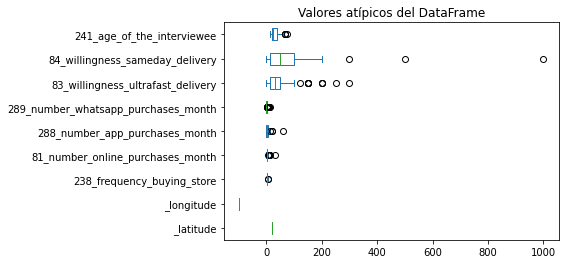

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,8)) #muestra el tamaño en que se muestra la imagen
data2.plot(kind="box",vert=False) #genera la caja o bigote y la grafica de todas las columnas que contengan valores atípicos
plt.title("Valores atípicos del DataFrame") # coloca el nombre de la grafica 
plt.show() #dibujamos el diagrama

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["241_age_of_the_interviewee"] #llama a la columna a la que se le quitarán los valores atípicos
percentile25=y.quantile(0.25) #se usa un porcentaje de 25 como límite inferior
percentile75=y.quantile(0.75) #se usa un porcentaje de 25 como límite superior
iqr=percentile75 - percentile25 #hace la resta de los límites

Limite_Superior_iqr=percentile75+1.5*iqr #mide la dispersión con el limite superior
Limite_Inferior_iqr=percentile25-1.5*iqr #mide la dispersión con el limite inferior
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr) #muestran los valores de los límites permitidos

Limite superior permitido 65.0
Limite interior permitido -7.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr #encuentra los valores que se salen del rango de los límites

In [ ]:
#Obtenemos datos limpios del DataFrame
data4_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data4_iqr #genera los datos limpios de la columna sin valores atípicos

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3)) #muestra el tamaño de la figura
plt.boxplot(data3_iqr["241_age_of_the_interviewee"]) #gráfica la caja con los valores ya dentro de los límites de una columna
plt.title("Valores atípicos de la edad de los entrevistados") #titulo de la grafica
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data4_iqr.copy()

Se hace el mismo procedimiento para todas las columnas con datos atípicos 

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["84_willingness_sameday_delivery"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 231.25
Limite interior permitido -118.75


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

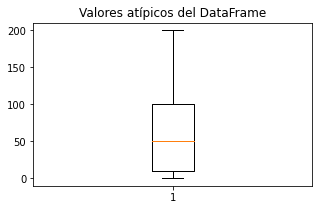

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["84_willingness_sameday_delivery"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data4_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["83_willingness_ultrafast_delivery"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 102.5
Limite interior permitido -37.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

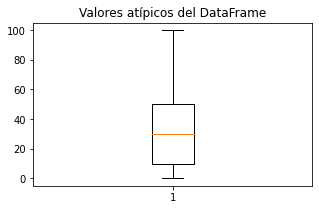

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["83_willingness_ultrafast_delivery"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data4_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["289_number_whatsapp_purchases_month"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 2.5
Limite interior permitido -1.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data4_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data4_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["289_number_whatsapp_purchases_month"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data3_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["288_number_app_purchases_month"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 12.5
Limite interior permitido -7.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data4_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data4_iqr

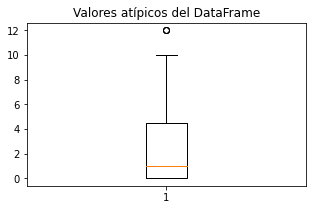

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["288_number_app_purchases_month"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data4_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["81_number_online_purchases_month"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 6.0
Limite interior permitido -2.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data4_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data4_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["81_number_online_purchases_month"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [ ]:
#Realizamos una copia del dataframe
consumer=data4_iqr.copy()

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75 
y=data2["238_frequency_buying_store"]
percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite interior permitido", Limite_Inferior_iqr)

Limite superior permitido 6.0
Limite interior permitido -2.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=data2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data4_iqr=data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data4_iqr

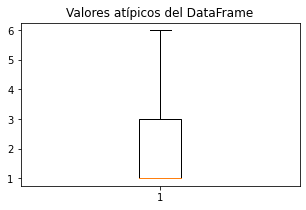

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(5,3))
plt.boxplot(data3_iqr["238_frequency_buying_store"])
plt.title("Valores atípicos del DataFrame")
plt.show() #dibujamos el diagrama

**Convertir DataSet sin valores nulos a CSV**

In [ ]:
#Convertir DataFrame a CSV
data4_iqr.to_csv("consumer_mit_lift_lab_Nuevo.csv") #una vez que se quitaron los valores nulos y los atípicos se convierte un archivo cvs

In [ ]:
#descargar archivo filtrado en csv
from google.colab import files

files.download("consumer_mit_lift_lab_Nuevo.csv") #se descarga el documento .csv con los datos limpio

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>